In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
df_train = pd.read_csv('/Users/rygofoss/Desktop/AI_SocialMediaEmotion Project2/train_update.csv')
df_train.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2004 entries, 0 to 2003
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 156.7+ KB


In [4]:
df_train['Age'].value_counts()

Age
28                                                      96
27                                                      96
29                                                      95
22                                                      77
26                                                      68
25                                                      67
24                                                      67
31                                                      66
21                                                      58
33                                                      58
30                                                      49
23                                                      49
35                                                      39
32                                                      39
34                                                      38
Male                                                    14
Female                                              

In [5]:
wrong_values = ['Male' , 'Female' , 'Non-binary' ,' işte mevcut veri kümesini 1000 satıra tamamlıyorum:']
df_train = df_train[~df_train['Age'].isin(wrong_values)]

In [6]:
df_train['Age'] = df_train['Age'].astype('Int64')

In [7]:
df_train['Age'].value_counts()

Age
28    96
27    96
29    95
22    77
26    68
25    67
24    67
31    66
33    58
21    58
30    49
23    49
35    39
32    39
34    38
Name: count, dtype: Int64

In [8]:
print("The Shape of Train Dataset is",df_train.shape)

The Shape of Train Dataset is (1965, 10)


       Gender  Count
0      Female    357
1        Male    346
2  Non-binary    259


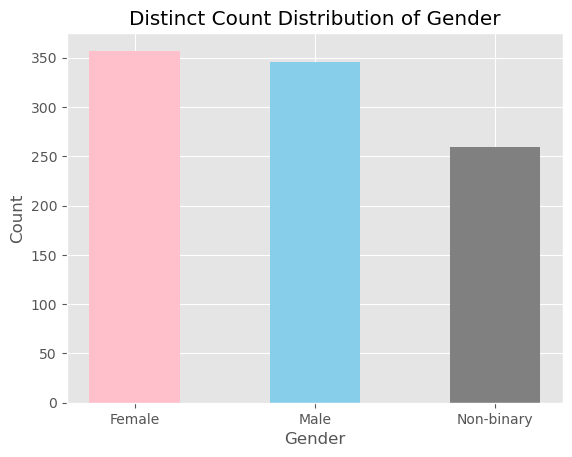

In [9]:
gender_cols = df_train['Gender'].value_counts().reset_index()
gender_cols.columns = ['Gender','Count']
print(gender_cols)
fig , ax = plt.subplots()
ax.bar(gender_cols['Gender'], gender_cols['Count'],color= ['pink','skyblue','grey'] \
      ,width = 0.5)
ax.set_title("Distinct Count Distribution of Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

Skipping Age as it is not a numeric column.


<Figure size 1000x600 with 0 Axes>

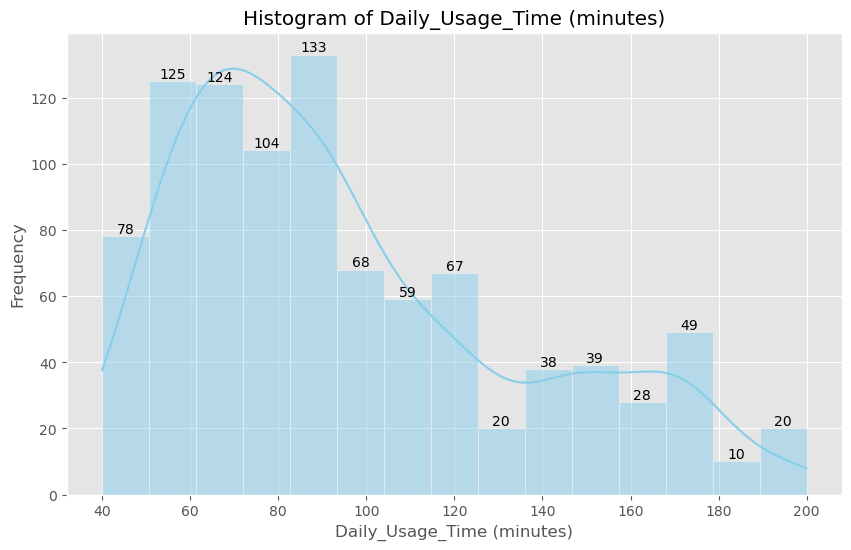

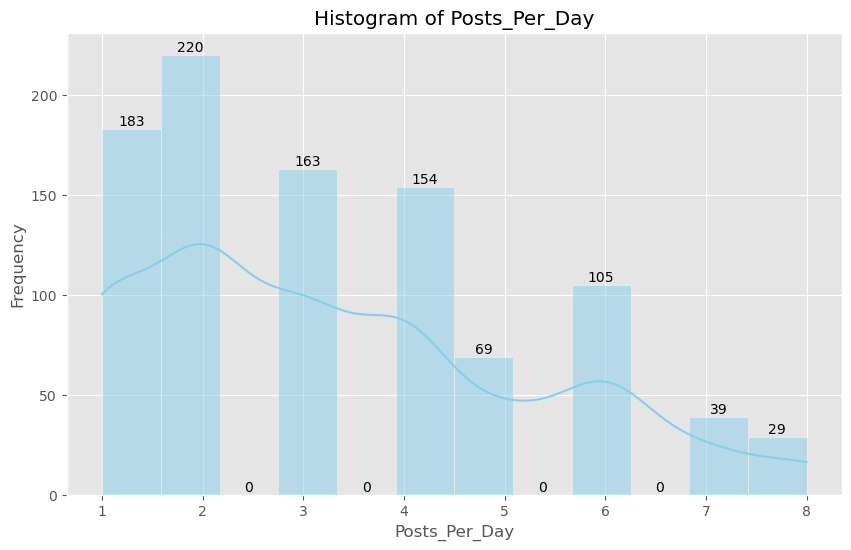

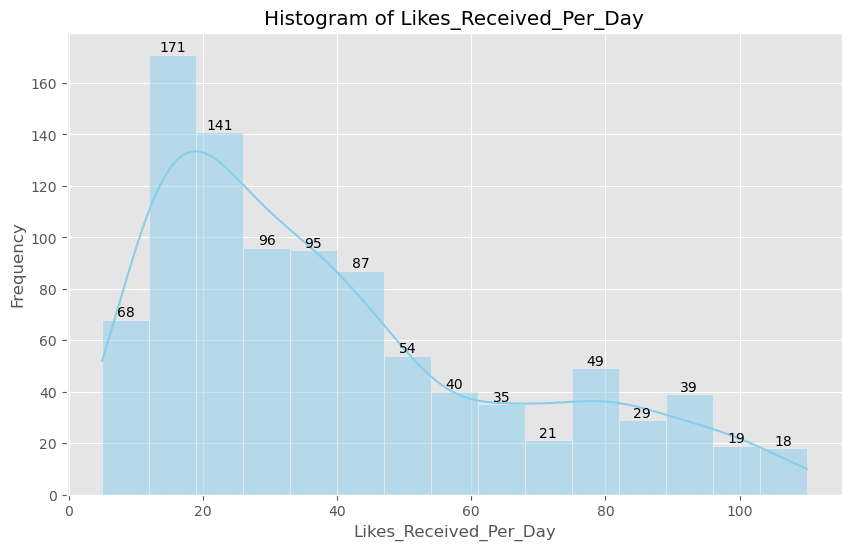

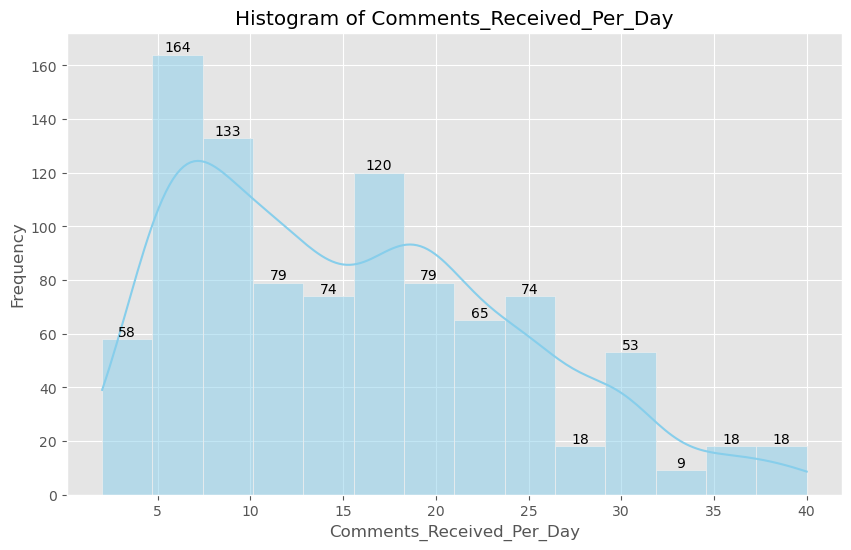

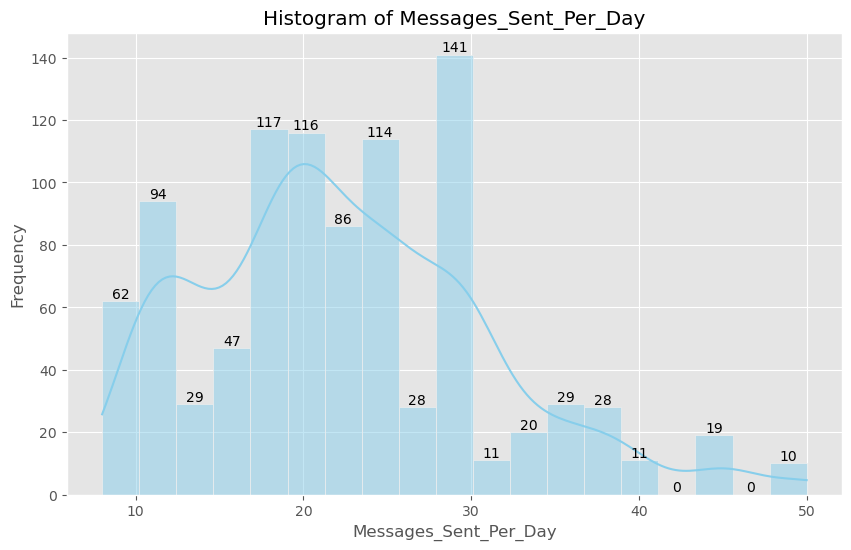

<Figure size 1000x600 with 0 Axes>

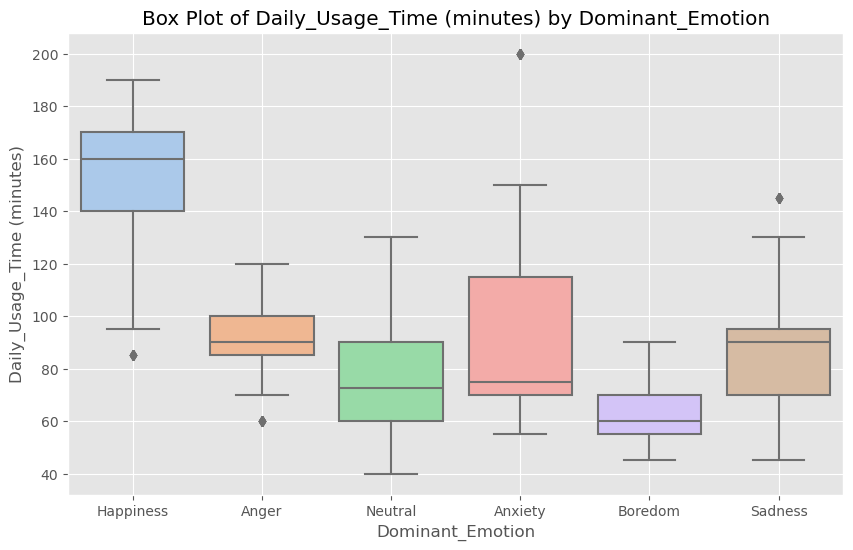

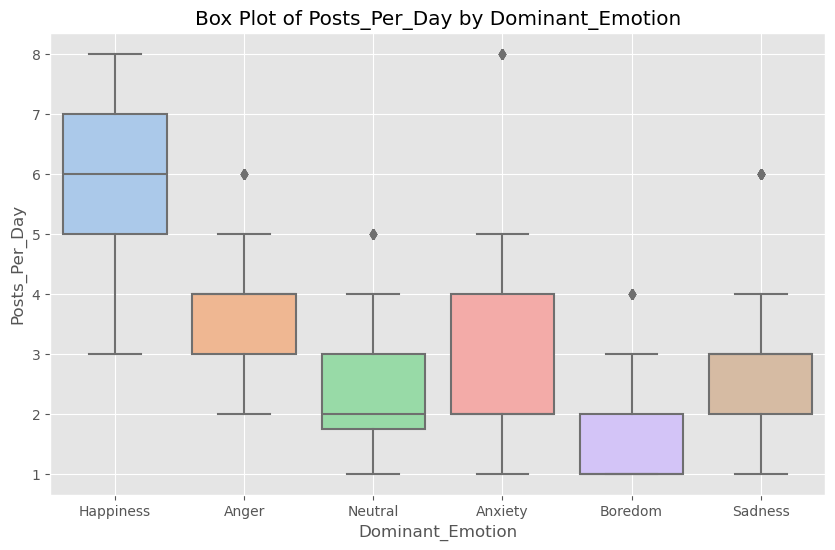

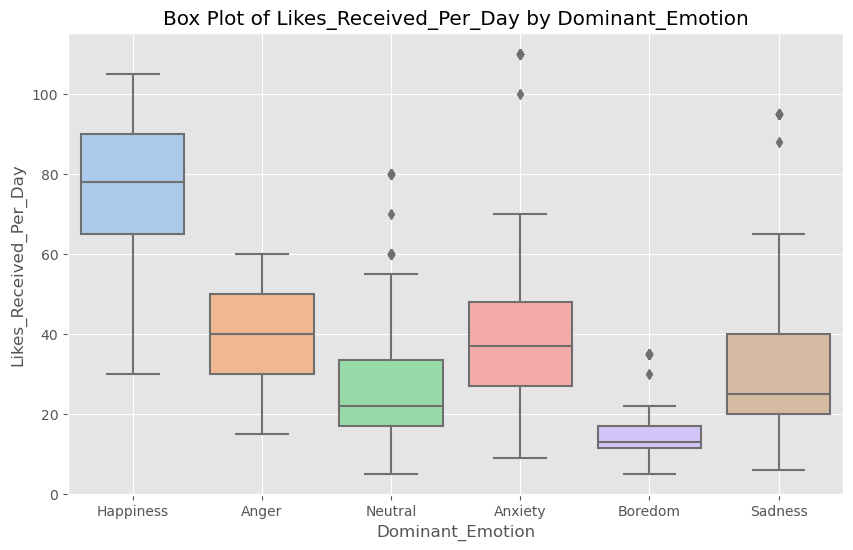

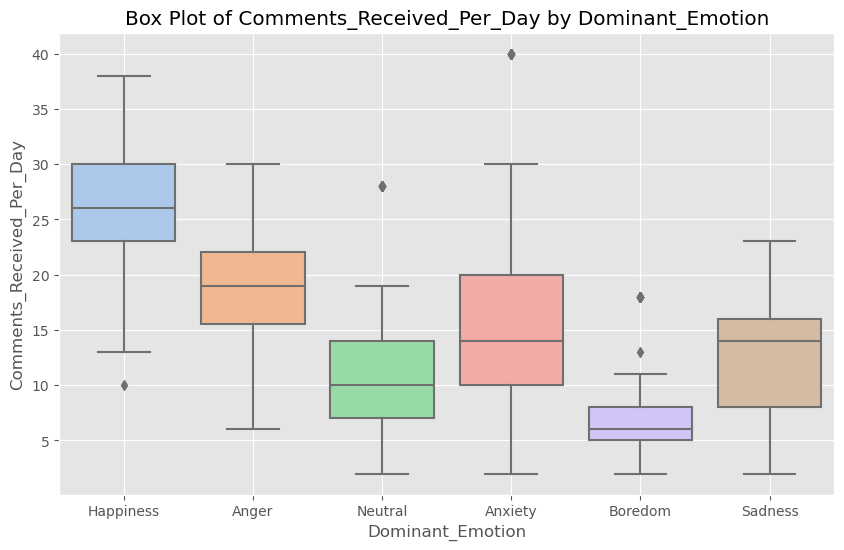

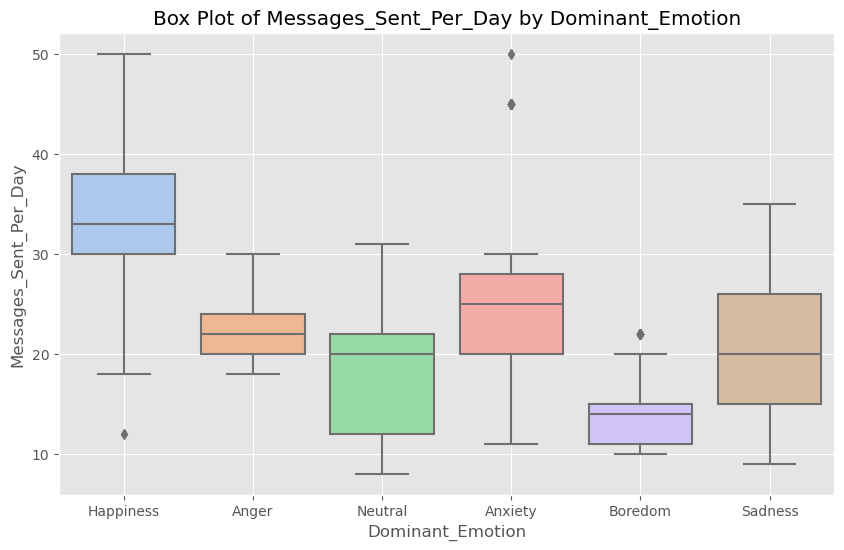

<Figure size 1000x600 with 0 Axes>

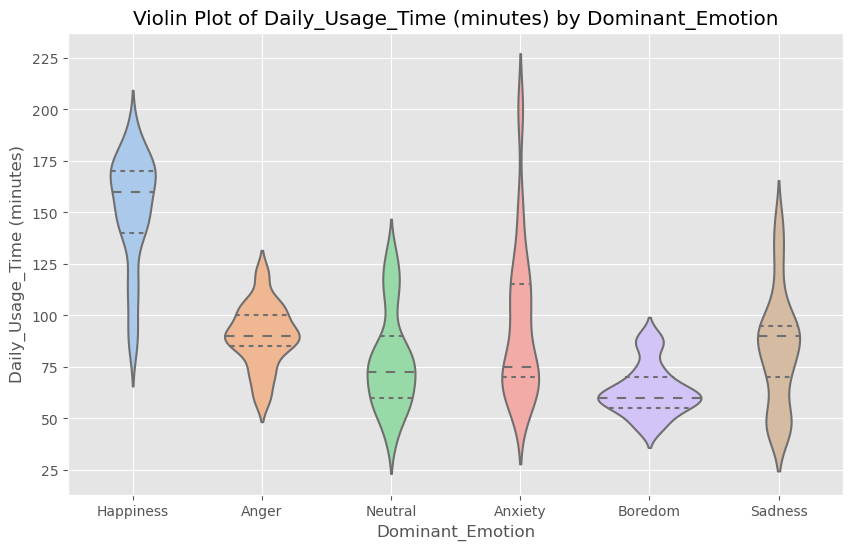

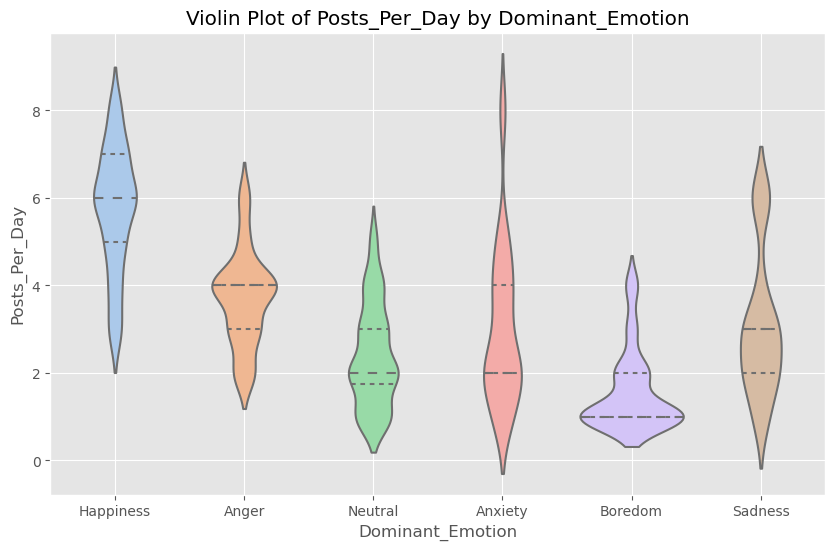

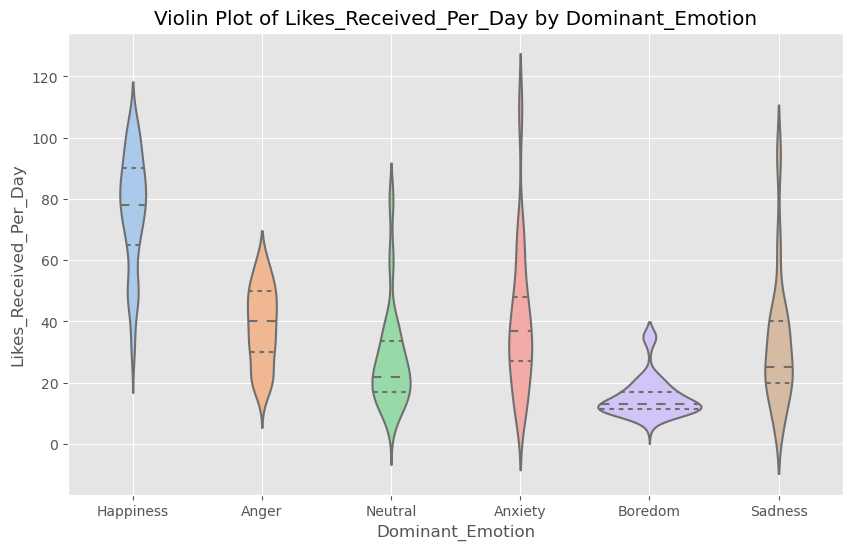

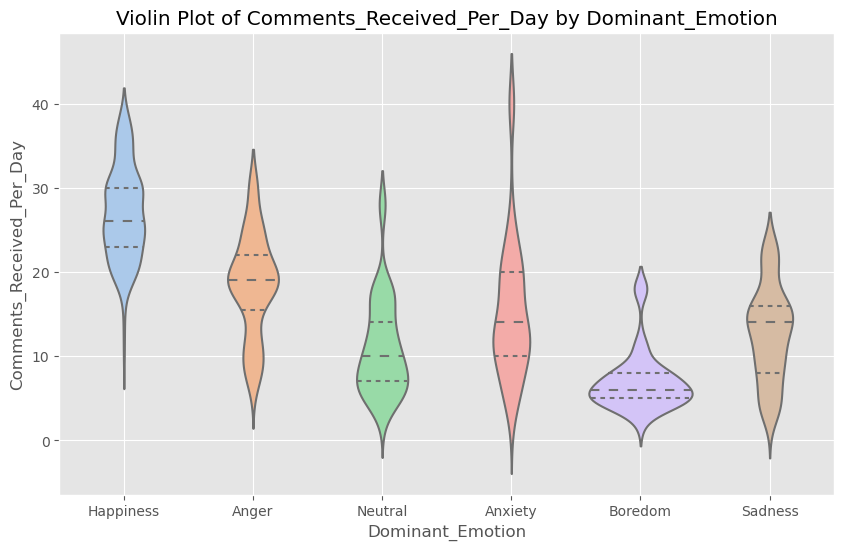

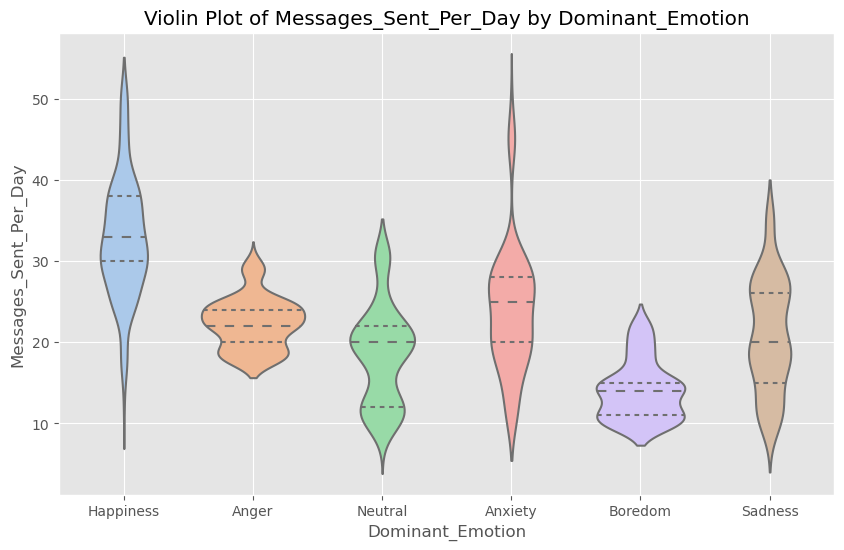

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of continuous variables
continuous_vars = ['Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
                   'Comments_Received_Per_Day', 'Messages_Sent_Per_Day']

# Plotting histograms for continuous variables
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    
    # Check if the column is numeric and clean it
    if df_train[var].dtype in ['float64', 'int64']:
        ax = sns.histplot(df_train[var].dropna(), kde=True, color='skyblue')
        plt.title(f'Histogram of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        plt.grid(True)
        
        # Add bar labels (optional, based on count plot data)
        for container in ax.containers:
            ax.bar_label(container, fmt='%d')
        
        plt.show()
    else:
        print(f"Skipping {var} as it is not a numeric column.")

# Box Plot for continuous variables vs Dominant_Emotion
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    
    if df_train[var].dtype in ['float64', 'int64']:
        sns.boxplot(data=df_train, x='Dominant_Emotion', y=var, palette='pastel')
        plt.title(f'Box Plot of {var} by Dominant_Emotion')
        plt.xlabel('Dominant_Emotion')
        plt.ylabel(var)
        plt.grid(True)
        plt.show()

# Violin plot for continuous variables vs Dominant_Emotion
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    
    if df_train[var].dtype in ['float64', 'int64']:
        sns.violinplot(data=df_train, x='Dominant_Emotion', y=var, palette='pastel', inner="quartile")
        plt.title(f'Violin Plot of {var} by Dominant_Emotion')
        plt.xlabel('Dominant_Emotion')
        plt.ylabel(var)
        plt.grid(True)
        plt.show()



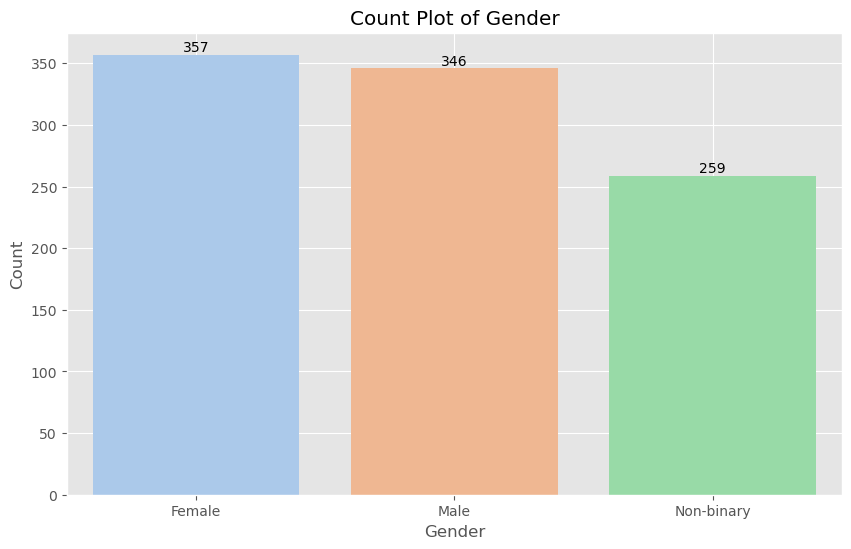

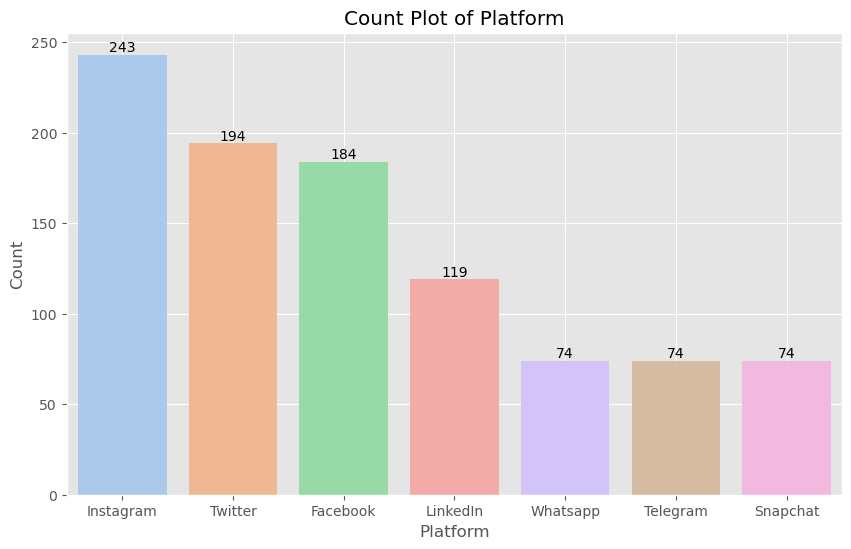

In [17]:
# List of categorical variables
categorical_vars = ['Gender', 'Platform']

# Plotting count plots for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df_train, x=var, palette='pastel')
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    for container in ax.containers:
        ax.bar_label(container, fmt = '%d')
    plt.show()

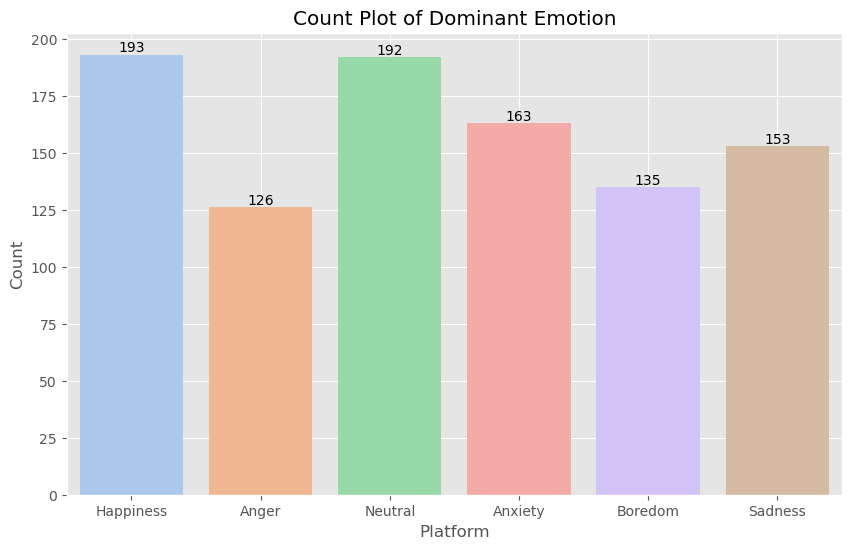

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x=df_train['Dominant_Emotion'], palette='pastel')
plt.title(f'Count Plot of Dominant Emotion')
plt.xlabel(var)
plt.ylabel('Count')
plt.grid(True)
for container in ax.containers:
    ax.bar_label(container, fmt = '%d')
plt.show()

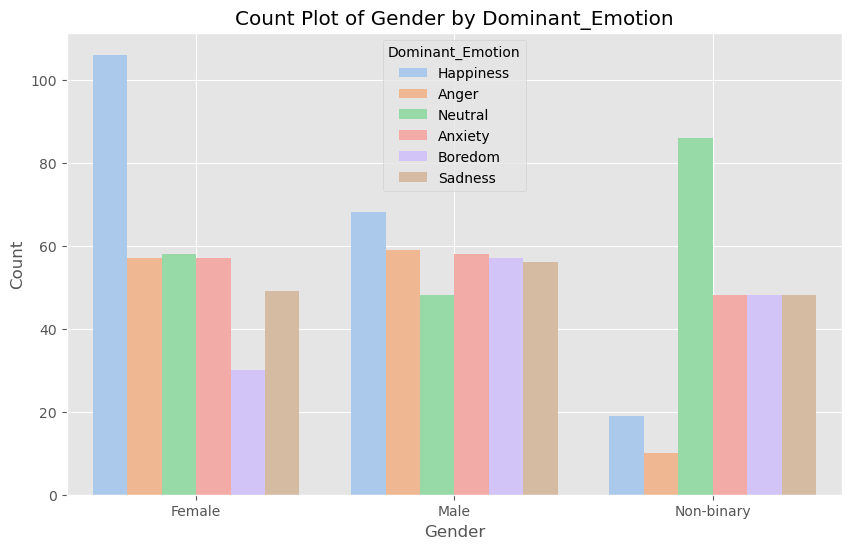

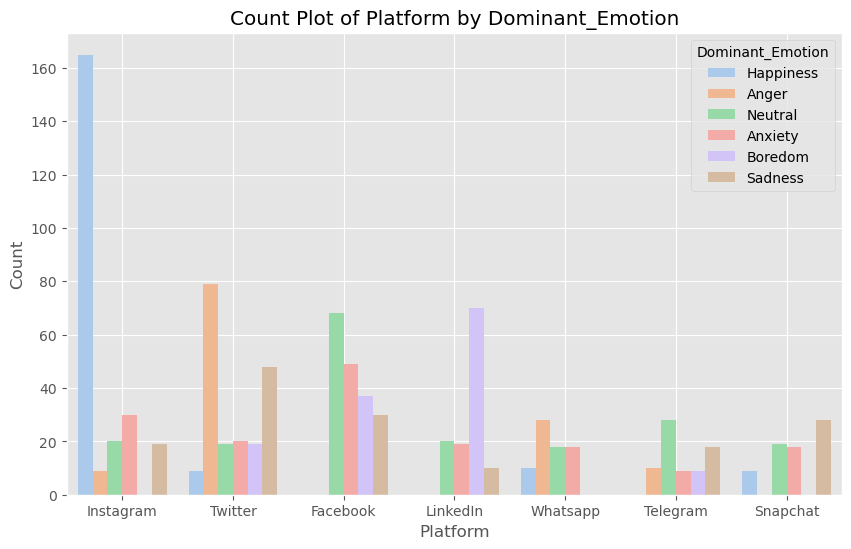

In [21]:
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train, x=var, hue='Dominant_Emotion', palette='pastel')
    plt.title(f'Count Plot of {var} by Dominant_Emotion')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


In [22]:
sns.pairplot(df_train[continuous_vars + ['Dominant_Emotion']], hue='Dominant_Emotion', palette='pastel', diag_kind='kde')
plt.show()

TypeError: boolean value of NA is ambiguous